In [ ]:
import numpy as np
cha_weight_dir = '/mnt/dataset1/ws2319/workspace/ESI_pipelines/**/leadfield_fsaverage_standard_1020.npz'
np.load(cha_weight_dir)
leadfield = np.load(cha_weight_dir)['leadfield']
uni_channel_names = np.load(cha_weight_dir)['uni']
L = leadfield
print(L.shape)
C = np.eye(L.shape[0])
W = np.linalg.inv(L.T @ np.linalg.inv(C) @ L) @ L.T @ np.linalg.inv(C)
print(W.shape)

In [6]:
import numpy as np
from scipy.io import loadmat
from scipy.spatial import distance

def find_nearest_channels(coords_matrix):
    num_channels = coords_matrix.shape[0]
    nearest_indices = np.zeros((num_channels, 60), dtype=int)
    
    for i in range(num_channels):
        # 计算当前通道到所有其他通道的距离
        distances = distance.cdist([coords_matrix[i]], coords_matrix, 'euclidean')[0]
        
        # 将自身距离设为无穷大，这样它不会被选为最近邻
        distances[i] = np.inf
        
        # 获取距离最近的3个通道的索引
        nearest_indices[i] = np.argsort(distances)[:60]
    
    return nearest_indices

# 加载.mat文件
mat_data = loadmat('SEED_coords_matrix.mat')  # 替换为你的.mat文件路径
coords_matrix = mat_data['coords_matrix']  # 假设矩阵名为'coords_matrix'


# 找到每个通道最近的3个邻居
nearest_channels = find_nearest_channels(coords_matrix)

# 结果现在存储在nearest_channels中，是一个60×3的整数矩阵
print(nearest_channels)
np.save('channel_interpolate', nearest_channels)

# 如果需要保存结果回.mat文件
# from scipy.io import savemat
# savemat('nearest_channels.mat', {'nearest_channels': nearest_channels})

[[ 3  1  6 ... 58 59  0]
 [ 0  2  3 ... 57 58  1]
 [ 1  4 12 ... 58 57  2]
 ...
 [51 50 58 ...  1  2 57]
 [59 57 53 ...  2  1 58]
 [55 54 56 ...  1  0 59]]


In [7]:
pro = np.load('channel_interpolate.npy')

In [8]:
pro.shape

(60, 60)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multichannel_data(data, x=None, offset=None, spacing=3.0, 
                          channel_labels=None, cmap='viridis', ax=None, **kwargs):
    """
    绘制多通道时间序列数据，自动垂直偏移通道
    
    参数：
    data : ndarray, shape (n_channels, n_time)
        输入的多通道时间序列数据
    x : ndarray, shape (n_time,), optional
        时间轴数据，默认为 [0, 1, ..., n_time-1]
    offset : float, optional
        通道间垂直偏移量，自动计算时使用 spacing * max_amplitude
    spacing : float
        通道间距系数（当offset为None时生效）
    channel_labels : list of str, optional
        通道标签列表
    cmap : str
        颜色映射名称
    ax : matplotlib axis, optional
        指定绘图的axis对象
    **kwargs : 
        传递给plot函数的其他参数
    """
    # 验证输入数据维度
    if data.ndim != 2:
        raise ValueError("输入数据必须是二维数组 (n_channels, n_time)")
    
    n_channels, n_time = data.shape
    x = np.arange(n_time) if x is None else x
    
    # 自动计算垂直偏移量
    if offset is None:
        max_amp = np.max(np.abs(data))
        offset = max_amp * spacing
    
    # 创建颜色映射
    colors = plt.cm.get_cmap(cmap)(np.linspace(0, 1, n_channels))
    
    # 创建或获取axis对象
    ax = ax if ax is not None else plt.gca()
    
    # 绘制每个通道
    for i in range(n_channels):
        y_shifted = data[i] + i * offset
        ax.plot(x, y_shifted, color=colors[i], **kwargs)
    
    # 设置y轴标签
    yticks = [i * offset for i in range(n_channels)]
    yticklabels = channel_labels if channel_labels else [f'Channel {i}' for i in range(n_channels)]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    
    ax.set_xlabel('Time')
    return ax

# plt.figure(figsize=(10, 6))
# plot_multichannel_data(data_trial, spacing=0)
# plt.title('Multichannel Biosignal Visualization')
# plt.tight_layout()
# plt.show()

(32, 625)


/tmp/ipykernel_1134847/888038347.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0, 1, n_channels))


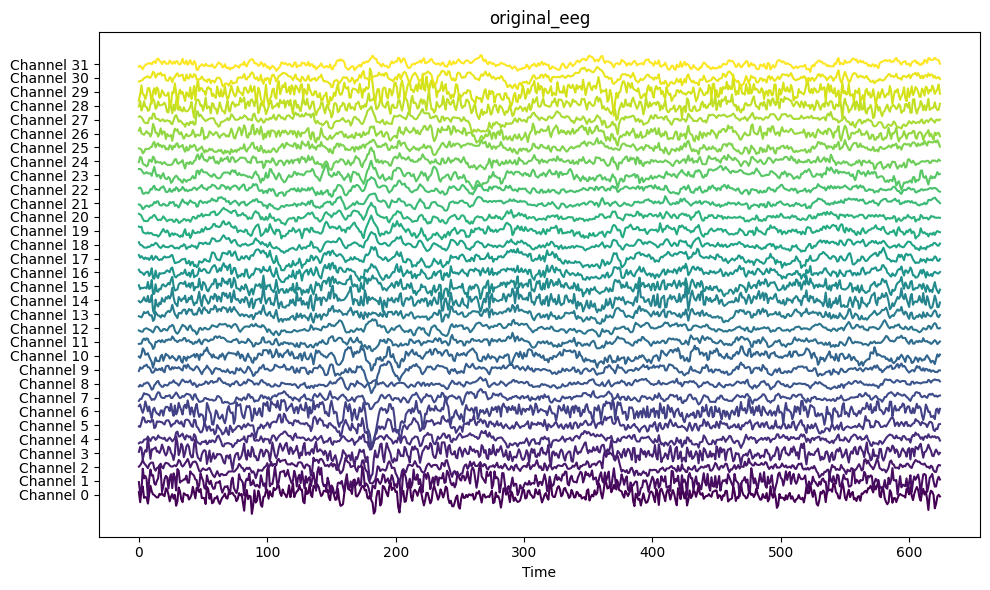

In [10]:
import numpy as np
data = np.load('./visualize/original_eeg.npy')
data_show = data[0][0]
print(data_show.shape)
plt.figure(figsize=(10, 6))
plot_multichannel_data(data_show, spacing=0.4)
plt.title('original_eeg')
plt.tight_layout()
plt.show()

(60, 625)


/tmp/ipykernel_1134847/888038347.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0, 1, n_channels))


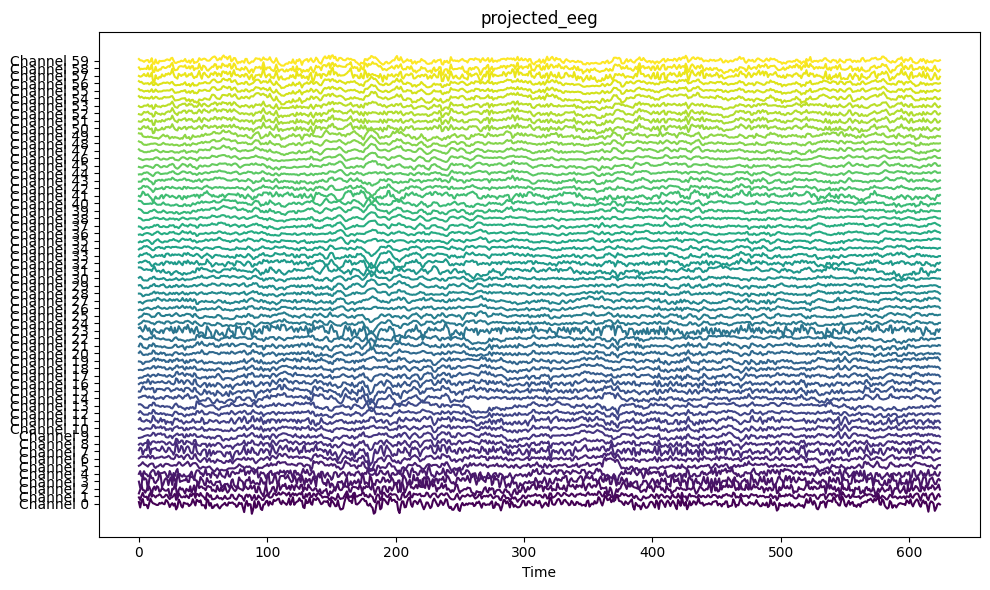

In [12]:
import numpy as np
data = np.load('./visualize/projected_eeg.npy')
data_show = data[0][0]
print(data_show.shape)
plt.figure(figsize=(10, 6))
plot_multichannel_data(data_show, spacing=0.4)
plt.title('projected_eeg')
plt.tight_layout()
plt.show()